In [134]:
import pandas as pd
import numpy as np

# orders = pd.read_csv('../Tables/orders_table.csv')
customers = pd.read_csv('../Tables/customers_table.csv')
# deliveries = pd.read_csv('../Tables/deliveries_table.csv')
products = pd.read_csv('../Tables/products_table.csv')

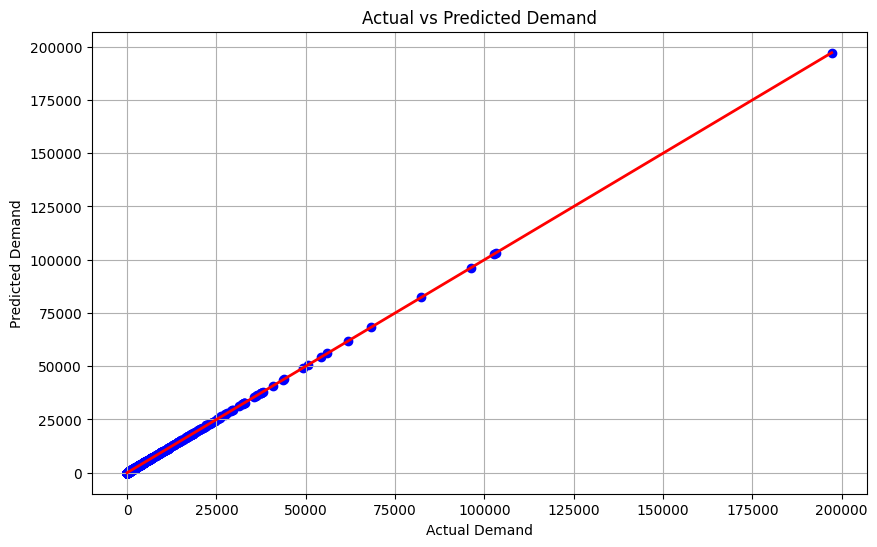

       product_id  total_sold  favorite  forecasted_demand
0               1       179.0     128.0              179.0
1               2        17.0      19.0               17.0
2               3      8100.0   21500.0             8100.0
3               4      6500.0    3400.0             6500.0
4               5        10.0     132.0               10.0
...           ...         ...       ...                ...
20307       20308       219.0    1600.0              219.0
20308       20309       215.0     304.0              215.0
20309       20310       152.0      98.0              152.0
20310       20311        16.0      27.0               16.0
20311       20312        89.0      61.0               89.0

[20312 rows x 4 columns]


In [138]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Step 1: Load the products table
products_df = pd.read_csv('../Tables/products_table.csv')

# Step 2: Select relevant columns for demand forecasting
# Using 'total_sold' as historical sales and 'favorite' as an indicator of customer interest
df = products_df[['total_sold', 'favorite']]

# Step 3: Handle missing values by imputing with the median
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Step 4: Create target variable (future demand) and feature set
X = df_imputed[['total_sold', 'favorite']]  # Feature set
y = df_imputed['total_sold']  # Target: future demand (assumed from past sales)

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Build a linear regression model to forecast future demand
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Predict future demand for the test set
y_pred = model.predict(X_test)

# Step 8: Plot actual vs predicted demand to visualize the accuracy
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Demand')
plt.ylabel('Predicted Demand')
plt.title('Actual vs Predicted Demand')
plt.grid(True)
plt.show()

# Step 9: Forecast future demand for all products
future_demand = model.predict(X)

# Step 10: Add the forecasted demand to the products DataFrame
products_df['forecasted_demand'] = future_demand

# Step 11: Display the forecasted demand for inventory optimization
print(products_df[['product_id', 'total_sold', 'favorite', 'forecasted_demand']])


       product_id  forecasted_demand         EOQ   Stock  total_sold
0               1              179.0   42.308392    2906       179.0
1               2               17.0   13.038405   31701        17.0
2               3             8100.0  284.604989    2044      8100.0
3               4             6500.0  254.950976     386      6500.0
4               5               10.0   10.000000      36        10.0
...           ...                ...         ...     ...         ...
20307       20308              219.0   46.797436   19076       219.0
20308       20309              215.0   46.368092    9406       215.0
20309       20310              152.0   38.987177  446287       152.0
20310       20311               16.0   12.649111    3695        16.0
20311       20312               89.0   29.832868    6800        89.0

[20312 rows x 5 columns]


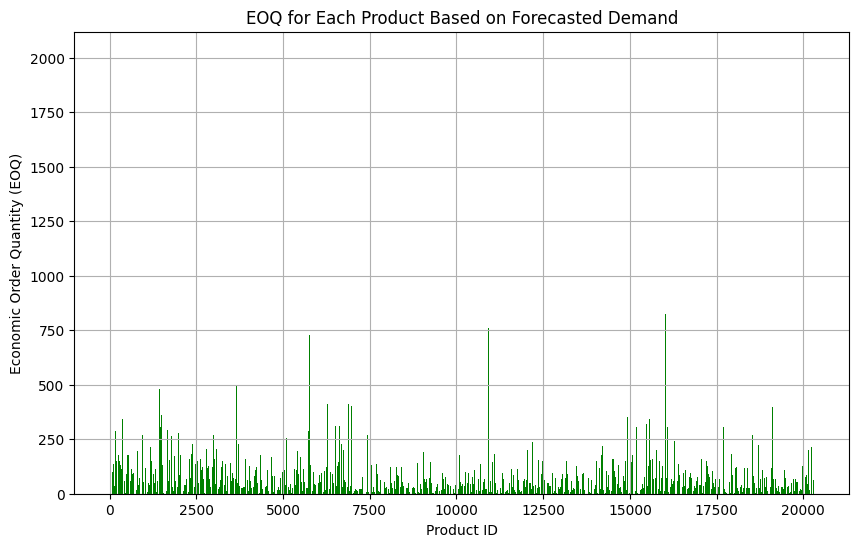

In [145]:
import numpy as np

# Step 11: Define ordering cost and holding cost
ordering_cost = 50  # Example cost per order
holding_cost = 10   # Example holding cost per unit per year

# Step 12: Calculate EOQ for each product using the forecasted demand
products_df['EOQ'] = np.sqrt((2 * products_df['forecasted_demand'] * ordering_cost) / holding_cost)

# Step 13: Display the products with forecasted demand and EOQ
print(products_df[['product_id', 'forecasted_demand', 'EOQ','Stock','total_sold']])

# Optional: Visualize EOQ for better understanding
plt.figure(figsize=(10, 6))
plt.bar(products_df['product_id'], products_df['EOQ'], color='green')
plt.xlabel('Product ID')
plt.ylabel('Economic Order Quantity (EOQ)')
plt.title('EOQ for Each Product Based on Forecasted Demand')
plt.grid(True)
plt.show()


C:\Users\MuhammadFauzan\AppData\Local\Temp\ipykernel_22436\4179441370.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_df_filtered['log_Stock'] = np.log(products_df_filtered['Stock'])
C:\Users\MuhammadFauzan\AppData\Local\Temp\ipykernel_22436\4179441370.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(products_df_filtered['log_Stock'], shade=True, color="skyblue")


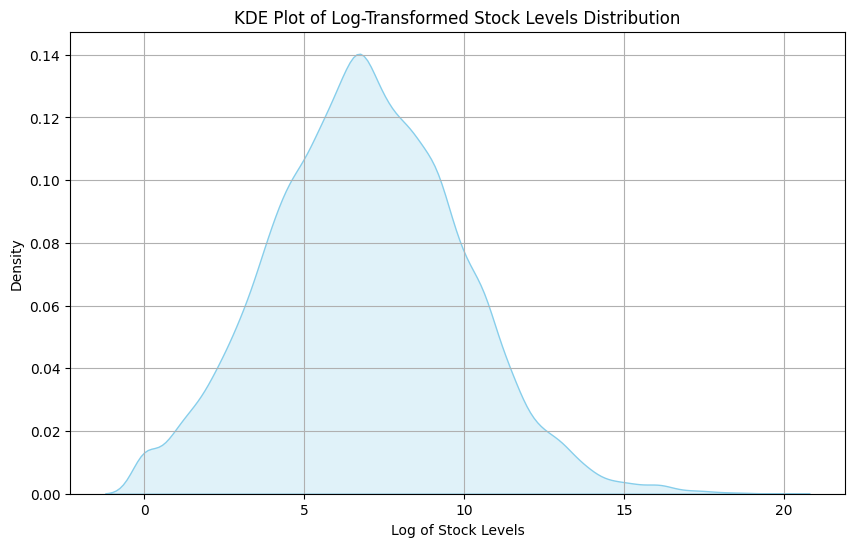

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Check if 'Stock' column exists and handle any non-positive values (log transformation requires positive values)
# We filter out rows with Stock <= 0 to avoid log errors
products_df_filtered = products_df[products_df['Stock'] > 0]

# Step 2: Apply log transformation to the stock levels
products_df_filtered['log_Stock'] = np.log(products_df_filtered['Stock'])

# Step 3: Create a KDE plot for the log-transformed stock levels
plt.figure(figsize=(10, 6))

# KDE plot for log-transformed Stock levels
sns.kdeplot(products_df_filtered['log_Stock'], shade=True, color="skyblue")

# Add labels and title
plt.xlabel('Log of Stock Levels')
plt.ylabel('Density')
plt.title('KDE Plot of Log-Transformed Stock Levels Distribution')

# Show the plot
plt.grid(True)
plt.show()
